In [1]:
import requests
import pandas as pd
import random
from pymongo import MongoClient

In [2]:
# Connect to MongoDB
client = MongoClient("mongodb://localhost:27017/apichat")

# Reading database collections
users = client.get_default_database()['users']
chats = client.get_default_database()['chats']
conversations = client.get_default_database()['conversations']

#### - Creates the hole database from whatsapp chat in MongoDB as follows:

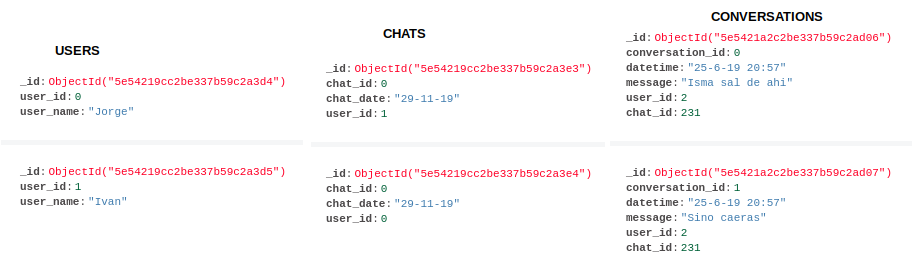

In [45]:
requests.get('http://localhost:5000//createdatabase').text

'Database created'

#### - Inserts a new user into dabase. We make a test with *'userTest'* name

In [3]:
requests.get('http://localhost:5000//insert/user/userTest').text

'User "userTest" has been inserted into users collection'

In [4]:
# Checks if user was created
list(users.find({'user_name':'userTest'}))

[{'_id': ObjectId('5e543bde2de0b4b202a79480'),
  'user_id': 15,
  'user_name': 'userTest'}]

#### - Inserts a new chat into dabase. We make a test with *'userTest'*

In [5]:
requests.get('http://localhost:5000//insert/chat/userTest').text

'Chat has been inserted into chats collection'

In [7]:
# Checks if chat with new user was created
list(chats.find({'chat_date':'24-02-2020'}))

[{'_id': ObjectId('5e543c012de0b4b202a79481'),
  'chat_date': '24-02-2020',
  'chat_id': 242,
  'user_id': 15}]

#### - Inserts an user to specified chat into dabase. We make a test with *'userTest'* and the chat created above. It should return a message that the user was already inserted into that chat.

In [22]:
requests.get('http://localhost:5000//insert/user/to/chat/24-02-2020/userTest').text

'User already exists in specified chat'

#### - Inserts new message from specified user and to specified chat into dabase. We make a test with *'userTest'*, the chat created above, date and time from today and a message *'Hola, que tal estás'*

In [24]:
requests.get('http://localhost:5000//insert/message/24-02-2020/userTest/24-02-2020 13:52/Hola, que tal estás').text

'Message "Hola, que tal estás" has been inserted into conversations collection'

In [27]:
# Checks if message was inserted
list(conversations.find({'datetime':'24-02-2020 13:52'}))

[{'_id': ObjectId('5e54405f6b1fbfa531e5363b'),
  'chat_id': 242,
  'conversation_id': 39933,
  'datetime': '24-02-2020 13:52',
  'message': 'Hola, que tal estás',
  'user_id': 15}]

#### - Returns a list from database with all users created

In [28]:
requests.get('http://localhost:5000//get/info/users').json()

['Alvarito',
 'Alvaro',
 'Antoñito',
 'Chema',
 'Eku',
 'Fonseca',
 'Ivan',
 'Jorge',
 'Jose',
 'Juli',
 'Laura',
 'Marlena',
 'Pete',
 'Pinedo',
 'Rafa',
 'userTest']

#### - Returns a string from database with all chats created. The chats creation is based on the date that conversation took place, therefore, any chat will have an unique date.

In [29]:
requests.get('http://localhost:5000//get/info/chats').text

'["1-1-20", "1-10-19", "1-11-19", "1-12-19", "1-2-20", "1-7-19", "1-8-19", "1-9-19", "10-1-20", "10-10-19", "10-11-19", "10-12-19", "10-2-20", "10-7-19", "10-8-19", "10-9-19", "11-1-20", "11-10-19", "11-11-19", "11-12-19", "11-2-20", "11-7-19", "11-8-19", "11-9-19", "12-1-20", "12-10-19", "12-11-19", "12-12-19", "12-2-20", "12-7-19", "12-8-19", "12-9-19", "13-1-20", "13-10-19", "13-11-19", "13-12-19", "13-2-20", "13-7-19", "13-8-19", "13-9-19", "14-1-20", "14-10-19", "14-11-19", "14-12-19", "14-2-20", "14-7-19", "14-8-19", "14-9-19", "15-1-20", "15-10-19", "15-11-19", "15-12-19", "15-2-20", "15-7-19", "15-8-19", "15-9-19", "16-1-20", "16-10-19", "16-11-19", "16-12-19", "16-2-20", "16-7-19", "16-8-19", "16-9-19", "17-1-20", "17-10-19", "17-11-19", "17-12-19", "17-2-20", "17-7-19", "17-8-19", "17-9-19", "18-1-20", "18-10-19", "18-11-19", "18-12-19", "18-2-20", "18-7-19", "18-8-19", "18-9-19", "19-1-20", "19-10-19", "19-11-19", "19-12-19", "19-2-20", "19-7-19", "19-8-19", "19-9-19", "2-1-

#### - Returns the user id, conversation id, date and time of posting and the messages posted in specified chat. We make a test with the chat created above.

In [30]:
requests.get('http://localhost:5000//get/info/24-02-2020').json()

[{'conversation_id': 39933,
  'datetime': '24-02-2020 13:52',
  'message': 'Hola, que tal estás',
  'user_id': 15}]

#### - Returns all the messages that a specified user has wrote in any chat. We make a tes with 'userTest'

In [31]:
requests.get('http://localhost:5000//get/messages/userTest').json()

[{'message': 'Hola, que tal estás'}]

#### - Returns the analysis of sentiment for given chat. We make a test with a random chat and for the two possibilities that our API gives us.

In [53]:
chat = random.choice(requests.get('http://localhost:5000//get/info/chats').json())
chat

'17-2-20'

In [54]:
requests.get(f'http://localhost:5000//get/sentiments/from/{chat}').json()

{'Negativity': '6.84%',
 'Neutrality': '93.05%',
 'Overall': 'NEUTRAL',
 'Positivity': '0.11%'}

In [55]:
requests.get(f'http://localhost:5000//get/sentiments/from/spanish/{chat}').text

'Chat Overall Rated As NEUTRAL'

#### - Given an user, returns the users with value of similarity. We make a test with *'Marlena'* user.

In [57]:
requests.get(f'http://localhost:5000//recommend/user/Marlena').json()

{'Alvarito': 0.9263311189974048,
 'Alvaro': 0.898908492414589,
 'Antoñito': 0.908956235655821,
 'Chema': 0.8847164644052554,
 'Eku': 0.9317217288388748,
 'Fonseca': 0.8924222403736669,
 'Ivan': 0.894794478247144,
 'Jorge': 0.9161181523356478,
 'Jose': 0.9582300530874728,
 'Juli': 0.8909607675737946,
 'Laura': 0.9265105558412053,
 'Pete': 0.9577814388294082,
 'Pinedo': 0.9024931669391589,
 'Rafa': 0.9274420651045412,
 'userTest': 0.9984733639237724}

In [3]:
a = {'Alvarito': 0.9263311189974048,
 'Alvaro': 0.898908492414589,
 'Antoñito': 0.908956235655821,
 'Chema': 0.8847164644052554,
 'Eku': 0.9317217288388748,
 'Fonseca': 0.8924222403736669,
 'Ivan': 0.894794478247144,
 'Jorge': 0.9161181523356478,
 'Jose': 0.9582300530874728,
 'Juli': 0.8909607675737946,
 'Laura': 0.9265105558412053,
 'Pete': 0.9577814388294082,
 'Pinedo': 0.9024931669391589,
 'Rafa': 0.9274420651045412,
 'userTest': 0.9984733639237724}

In [15]:
from operator import itemgetter
b = [x for x in a.items()]
c = sorted(set([(key,value) for key,value in b]),key=itemgetter(1),reverse=True)
c

[('userTest', 0.9984733639237724),
 ('Jose', 0.9582300530874728),
 ('Pete', 0.9577814388294082),
 ('Eku', 0.9317217288388748),
 ('Rafa', 0.9274420651045412),
 ('Laura', 0.9265105558412053),
 ('Alvarito', 0.9263311189974048),
 ('Jorge', 0.9161181523356478),
 ('Antoñito', 0.908956235655821),
 ('Pinedo', 0.9024931669391589),
 ('Alvaro', 0.898908492414589),
 ('Ivan', 0.894794478247144),
 ('Fonseca', 0.8924222403736669),
 ('Juli', 0.8909607675737946),
 ('Chema', 0.8847164644052554)]